In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
from sampler import *
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

# Simulation and Dimensionality Reduction

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from deeptime.data import ellipsoids
from sklearn.decomposition import PCA
from deeptime.decomposition import VAMP, TICA

data = ellipsoids(seed=17)
traj = data.observations(n_steps=5000)

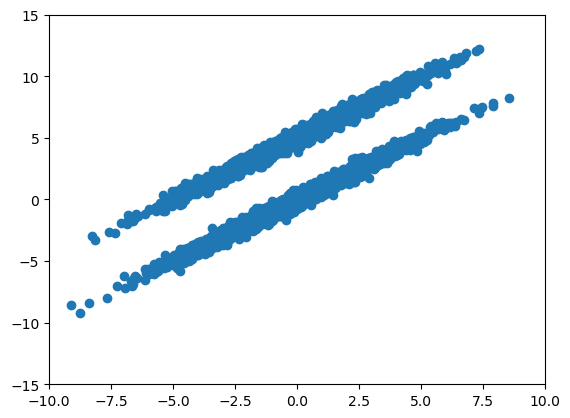

In [129]:
fig,ax1 = plt.subplots()
ax1.scatter(*traj[:,:2].T)

In [130]:
vamp = VAMP(dim=1, lagtime=1)
vamp = vamp.fit(traj).fetch_model()
vamp_projection = vamp.transform(traj)
dxy_vamp = vamp.singular_vectors_left[:, 0]  # dominant vamp component


tica = TICA(dim=1, lagtime=1)
tica = tica.fit(traj).fetch_model()
tica_projection = tica.transform(traj)
dxy_tica = tica.singular_vectors_left[:, 0]  # dominant tica component


pca = PCA(n_components=1)
pca.fit(traj)
pca_projection = pca.transform(traj)
dxy_pca = pca.components_[0]  # dominant pca component

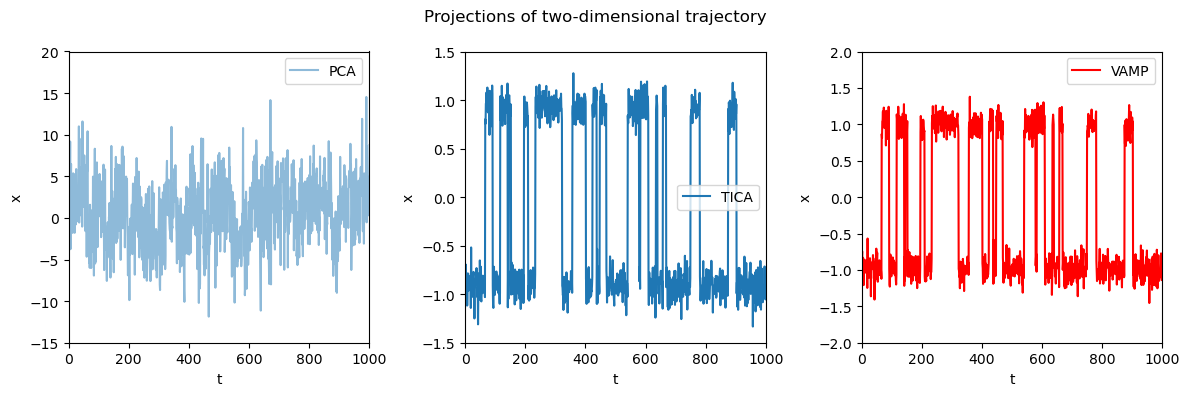

In [131]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax1,ax2,ax3 = ax.flat
fig.suptitle("Projections of two-dimensional trajectory")
ax1.plot(pca_projection, label='PCA', alpha=.5)
ax2.plot(tica_projection, label='TICA')
ax3.plot(vamp_projection, label='VAMP', c='r')
for ax in ax.flat:
    ax.set_ylabel('x')
    ax.set_xlabel('t')
    ax.set_xlim(0,1000)
    ax.legend()
fig.tight_layout()

# Clustering

In [168]:
from deeptime.clustering import KMeans,RegularSpace

clustering1 = KMeans(n_clusters=50, fixed_seed=13).fit(tica_projection).fetch_model()
assignments1 = clustering1.transform(tica_projection)

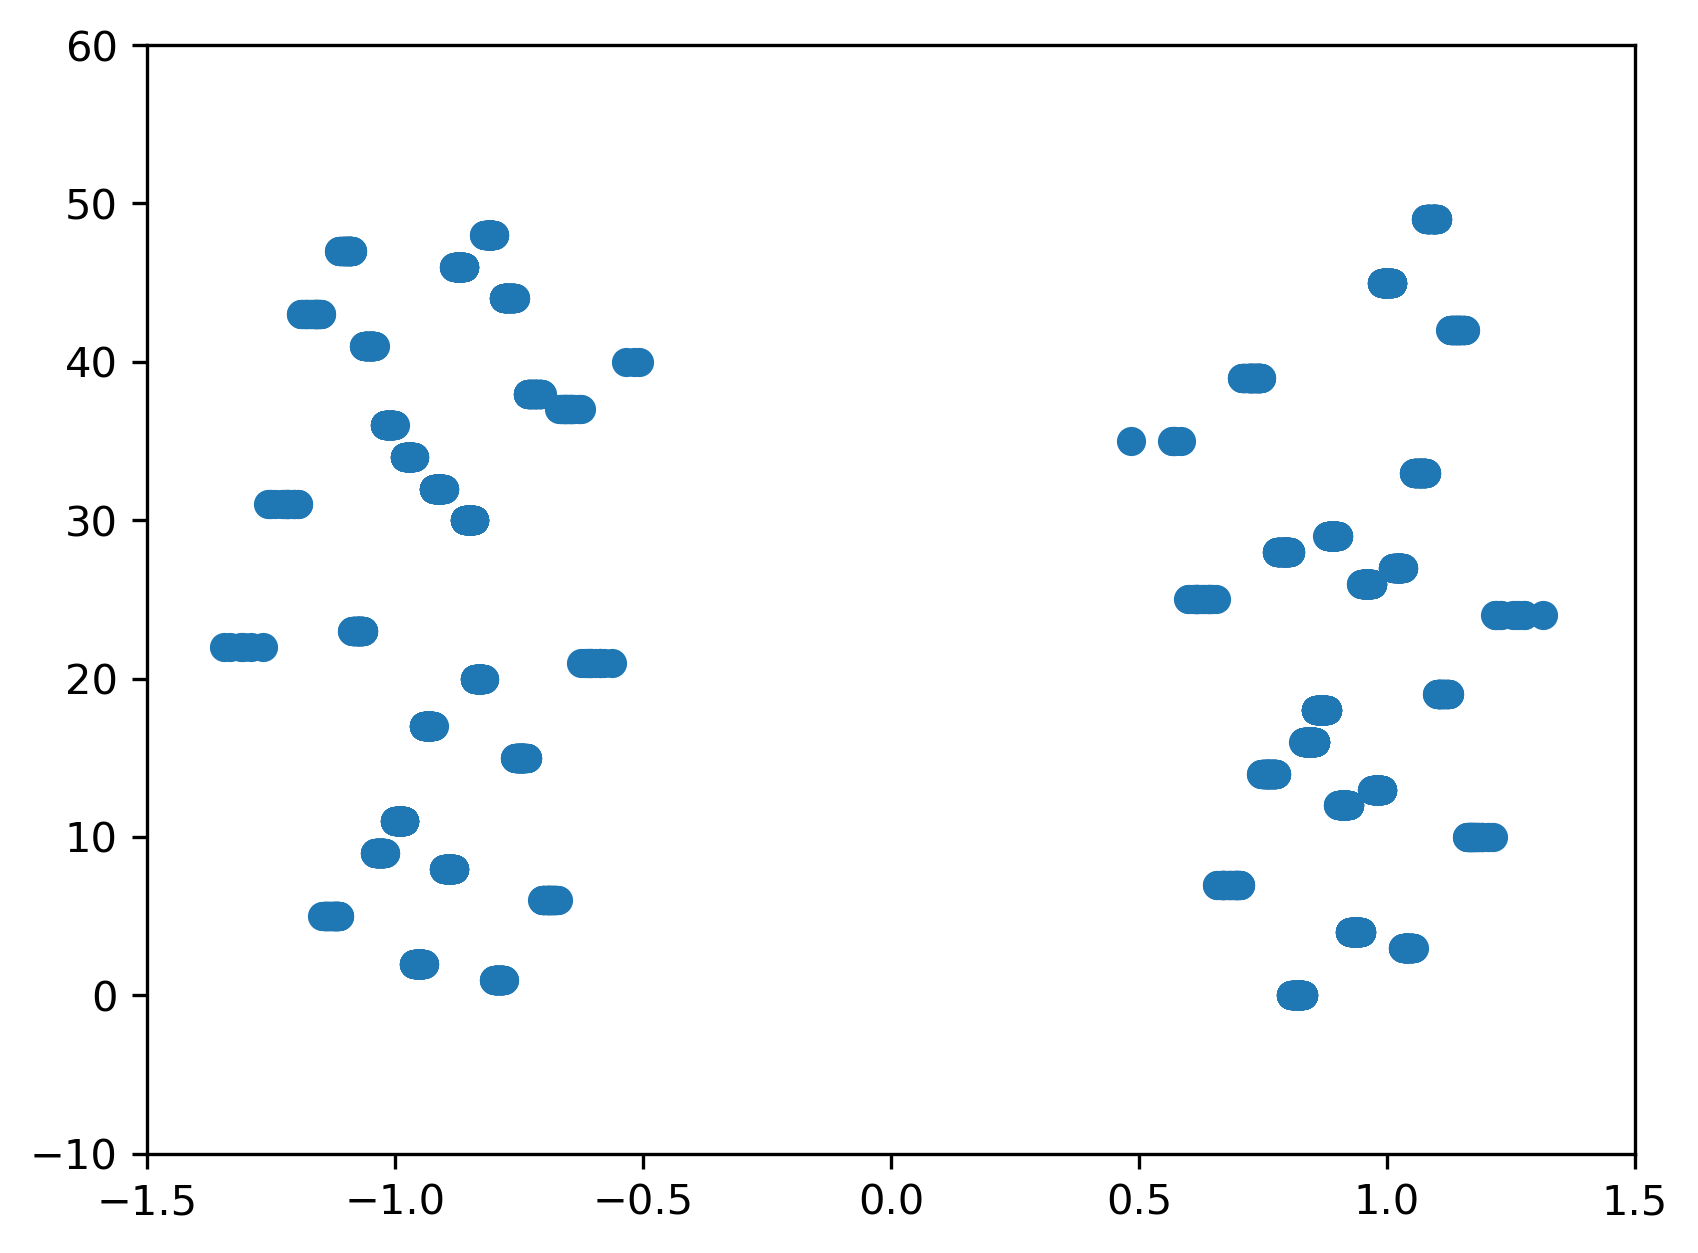

In [170]:
fig,ax1 = plt.subplots(dpi=300)
ax1.scatter(tica_projection,assignments1)

# Building MSMs

In [156]:
from deeptime.markov.msm import MaximumLikelihoodMSM,BayesianMSM
lags = [1,2,3,4,5,6,7,8,9,10]
msm1 = [MaximumLikelihoodMSM(lagtime=int(i)).fit_fetch(assignments1) for i in lags]
bmsm1 = [BayesianMSM(lagtime=int(i)).fit_fetch(assignments1) for i in lags]

<AxesSubplot:>

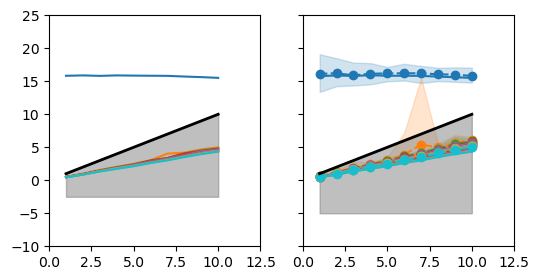

In [164]:
from deeptime.plots import plot_implied_timescales
from deeptime.util.validation import implied_timescales
fig,axes = plt.subplots(1,2,figsize=(6,3),sharey=True)
ax1,ax2 = axes.flat
plot_implied_timescales(implied_timescales(msm1,n_its=10),ax=ax1)
plot_implied_timescales(implied_timescales(bmsm1,n_its=10),ax=ax2)